<a href="https://colab.research.google.com/github/esa1236363/machinelearning_uts/blob/main/uts_1_carpriceasiigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Feature selection Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold

# Machine Learning Libraries
import sklearn
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample #for Bootstrap sampling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import learning_curve

In [ ]:
dataset = pd.read_csv('/content/CarPrice_Assignment.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
dataset.shape

(205, 26)

In [ ]:
dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

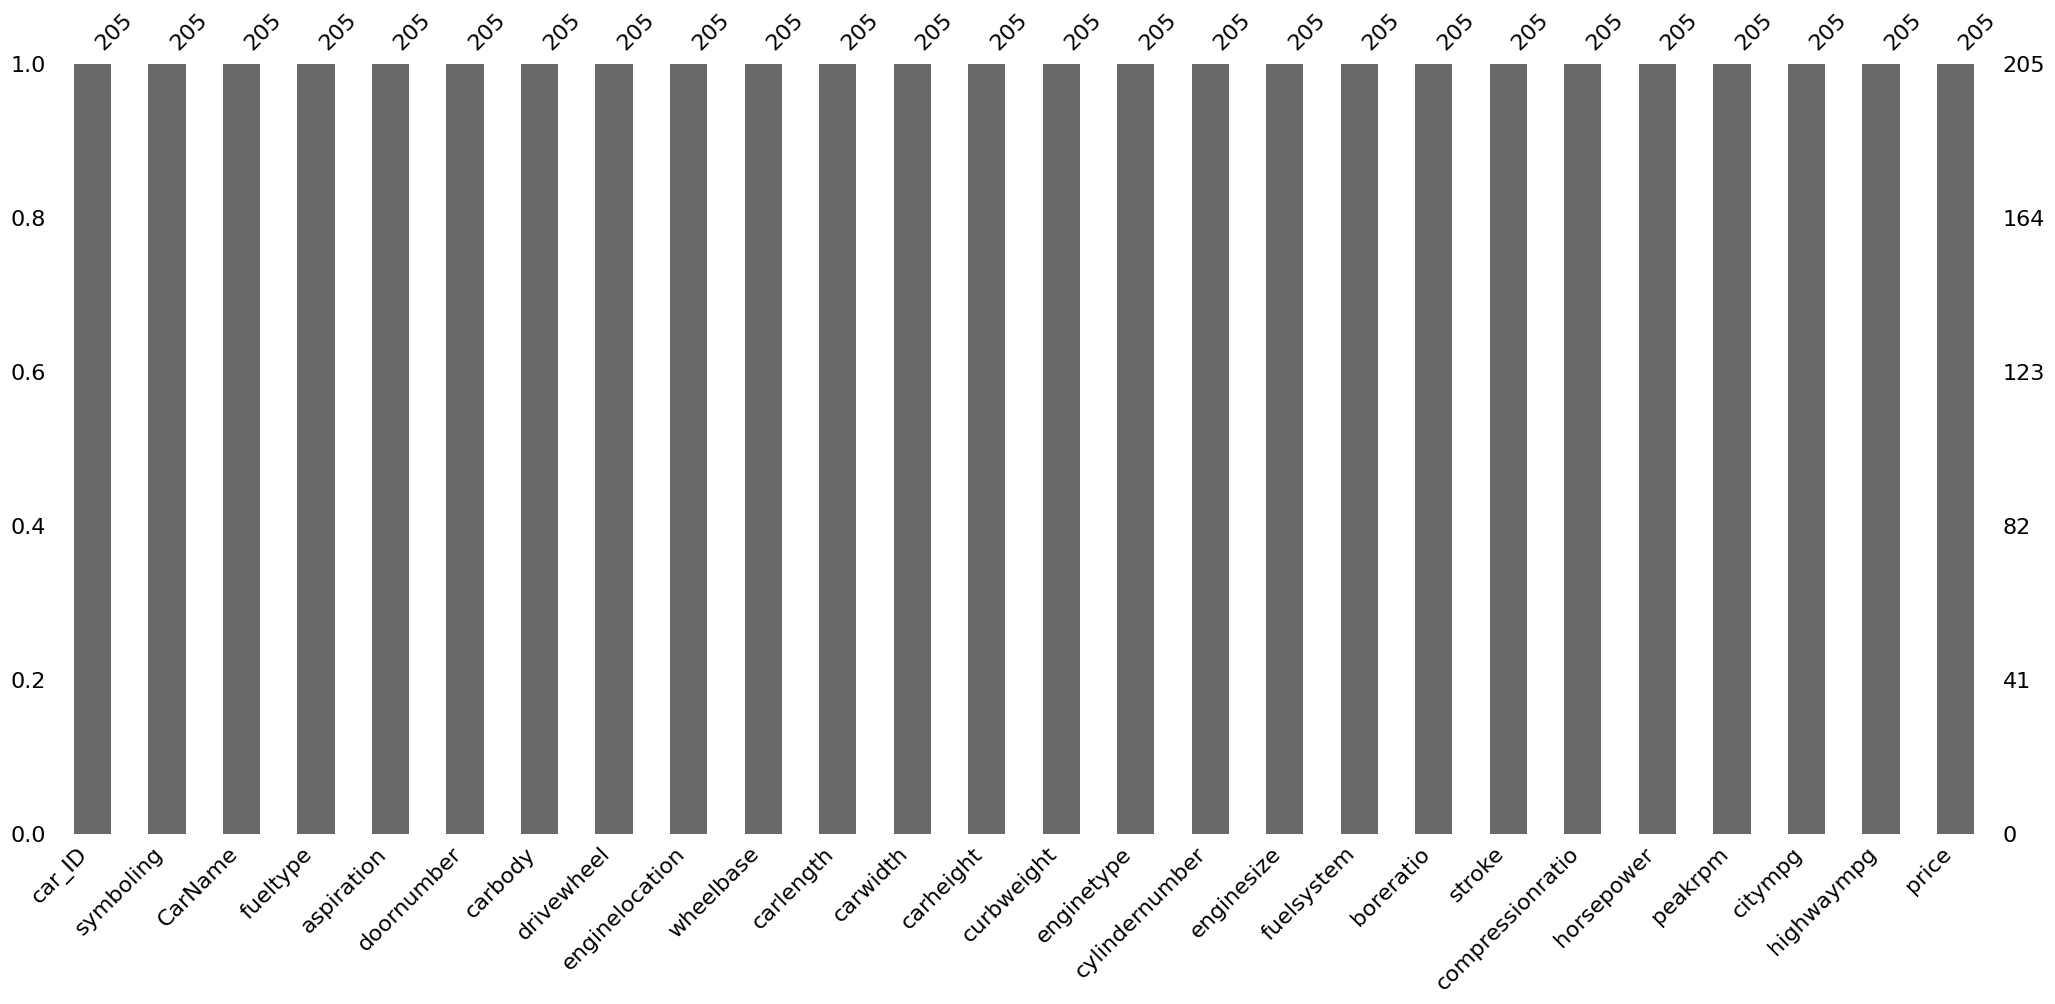

In [ ]:

import missingno as msno
msno.bar(dataset)
plt.show()

In [ ]:
dataset.var()

car_ID              3.519167e+03
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

In [ ]:
dataset['price'].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

<Axes: xlabel='price', ylabel='car_ID'>

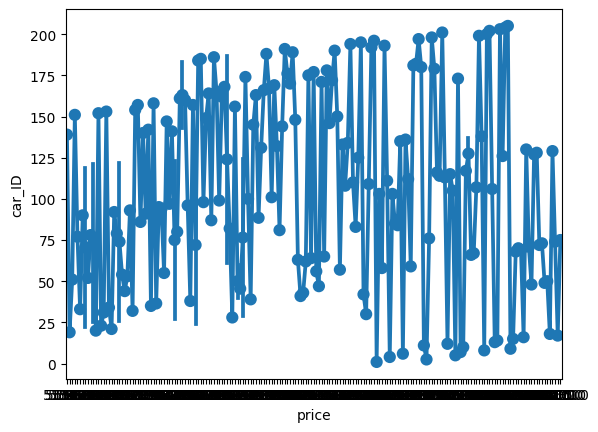

In [ ]:
sns.pointplot(y='car_ID',x='price',data=dataset)

<Axes: xlabel='price', ylabel='carbody'>

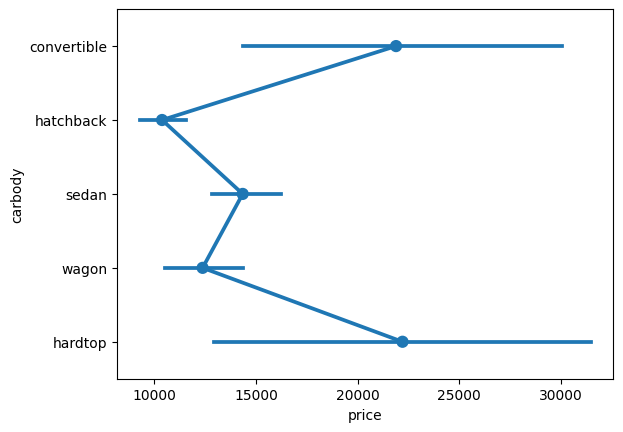

In [ ]:
sns.pointplot(x='price',y='carbody',data=dataset)

<Axes: xlabel='price', ylabel='carbody'>

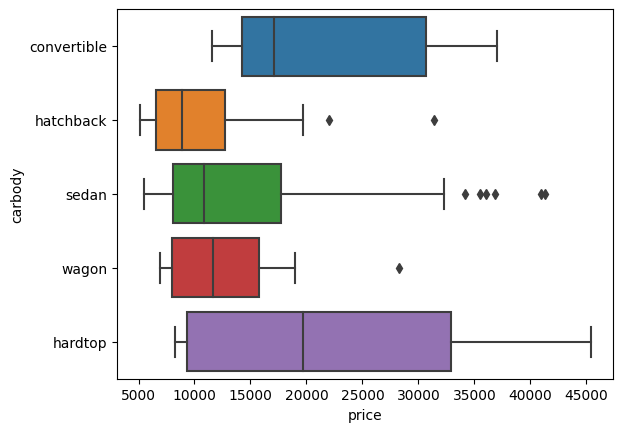

In [ ]:
sns.boxplot(x='price',y='carbody',data=dataset)

<Axes: xlabel='price', ylabel='enginetype'>

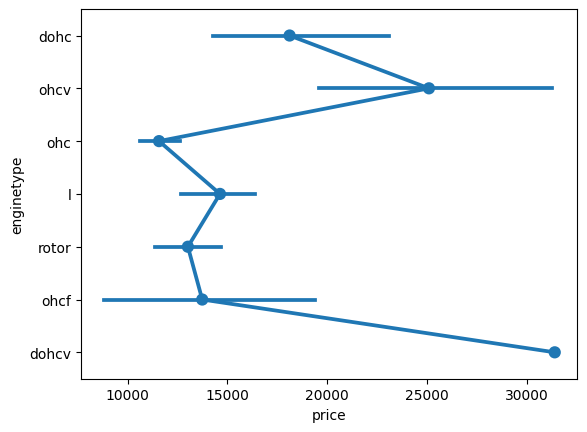

In [ ]:
sns.pointplot(x='price',y='enginetype',data=dataset)

In [ ]:
col = dataset.columns
col

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
categorical_col = ['car_ID','symboling','aspiration','fueltype','CarName','price']

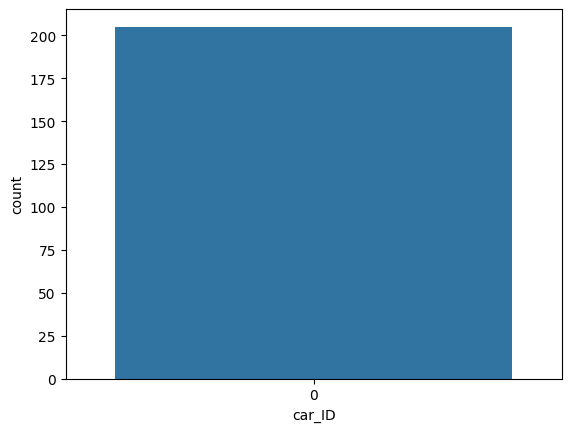

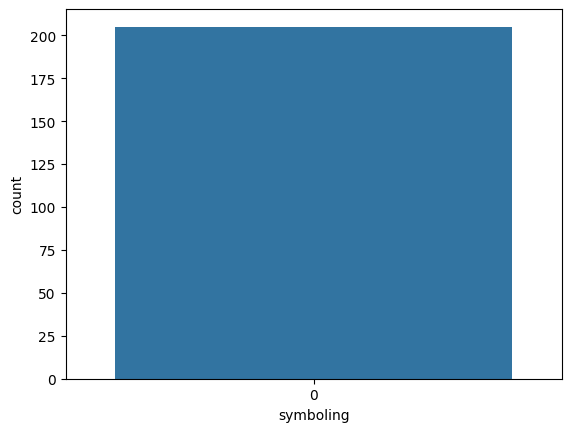

ValueError: ignored

In [ ]:
for i in categorical_col:
  sns.countplot(dataset[i])
  plt.xlabel(i)
  plt.show()

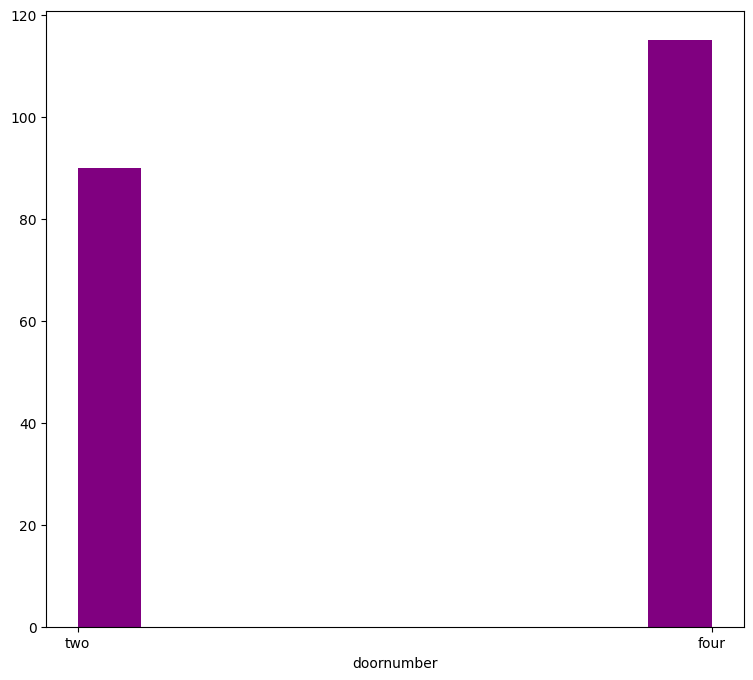

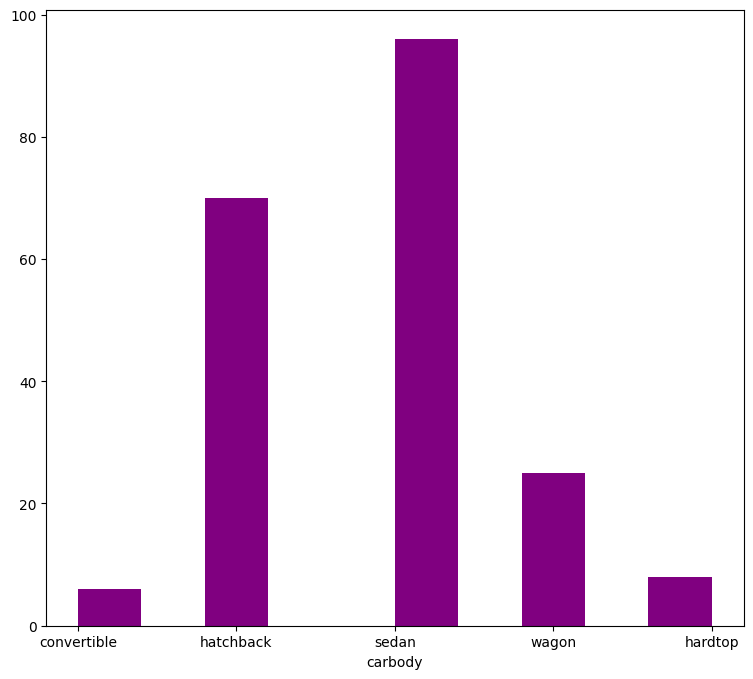

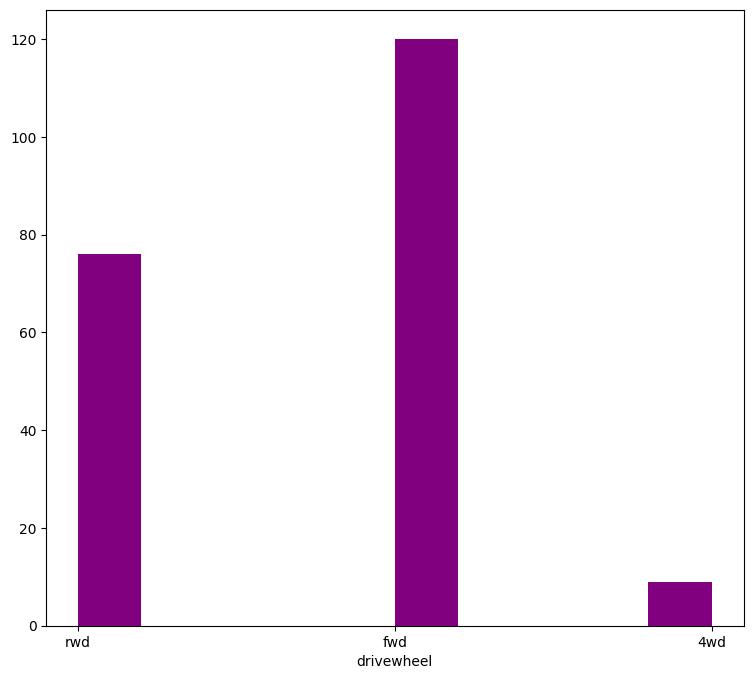

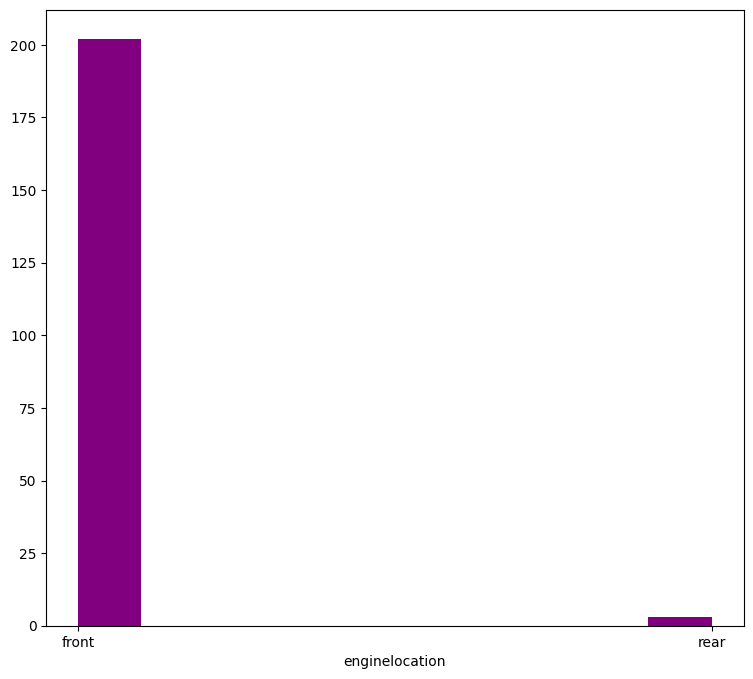

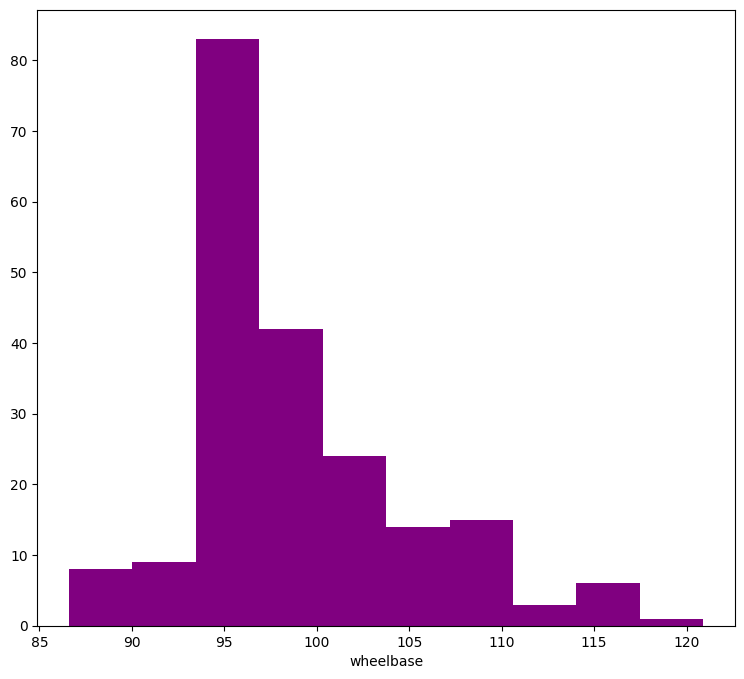

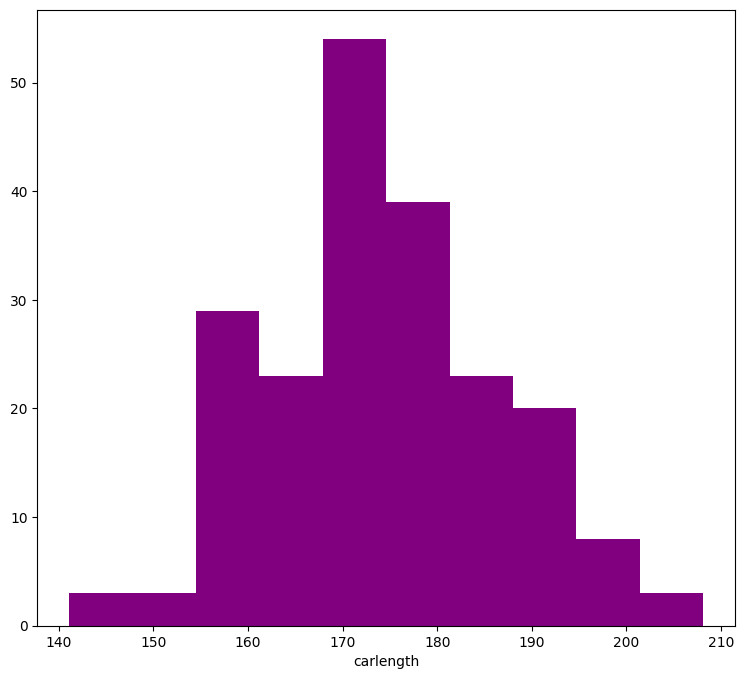

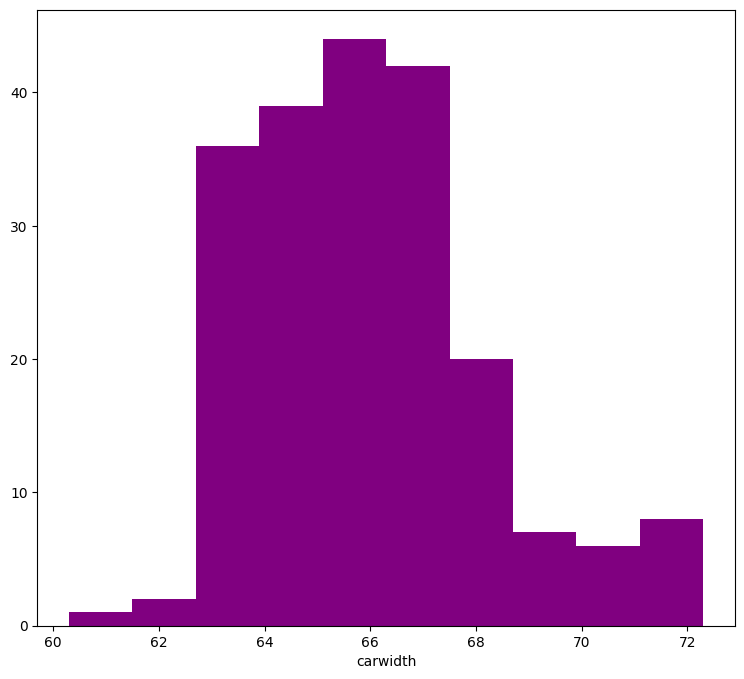

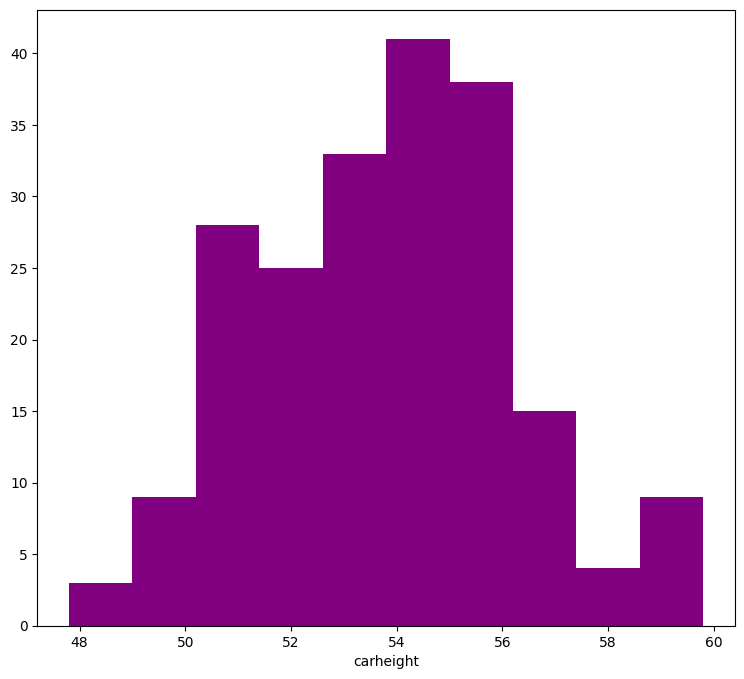

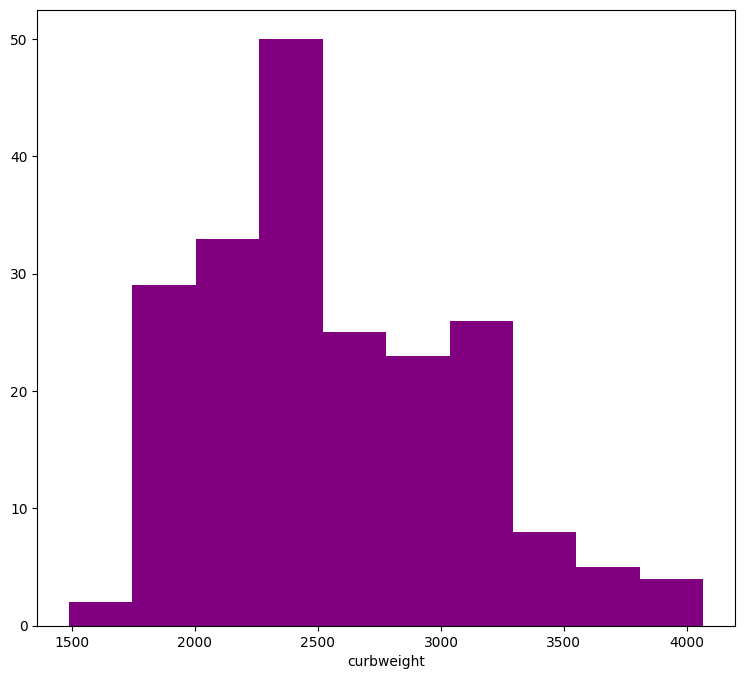

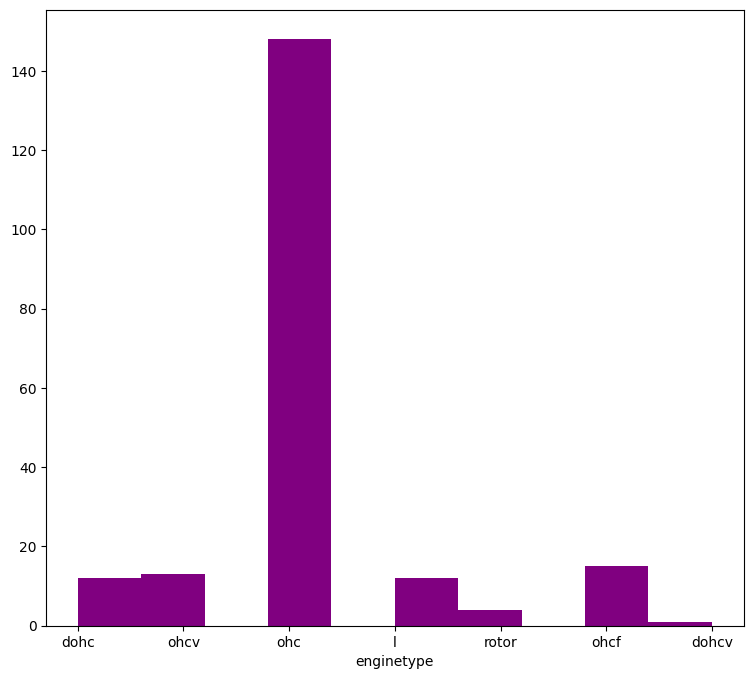

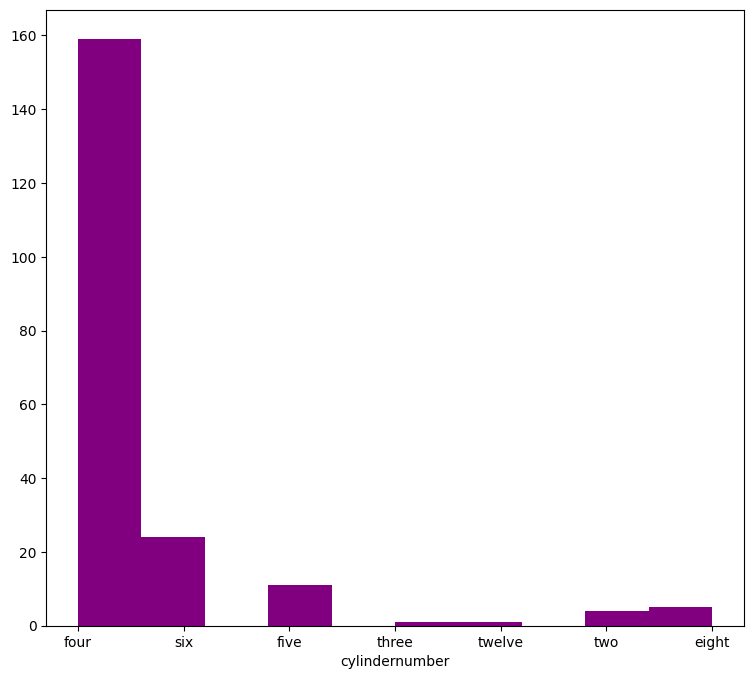

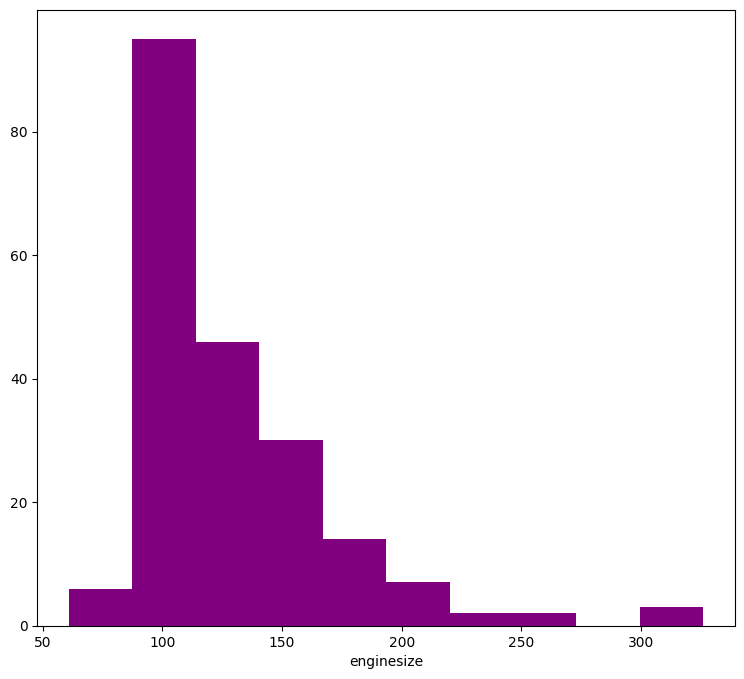

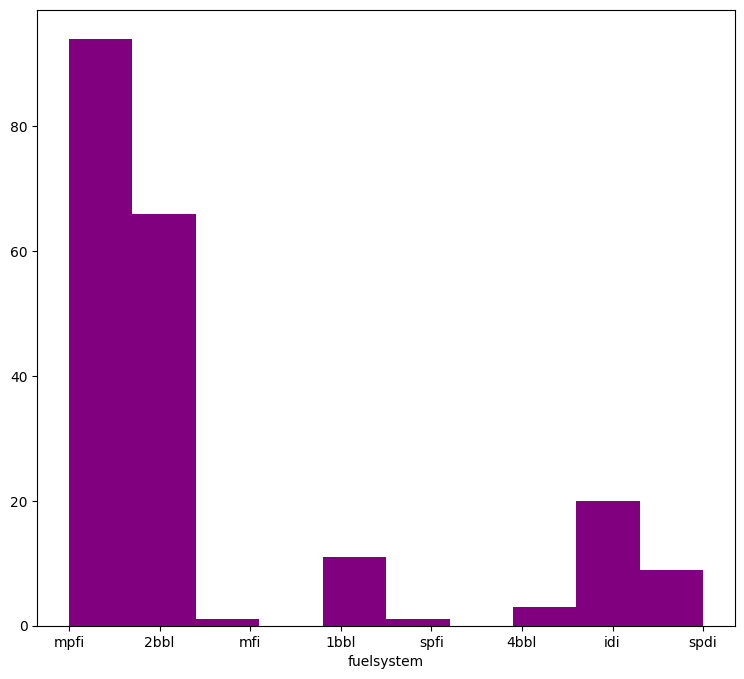

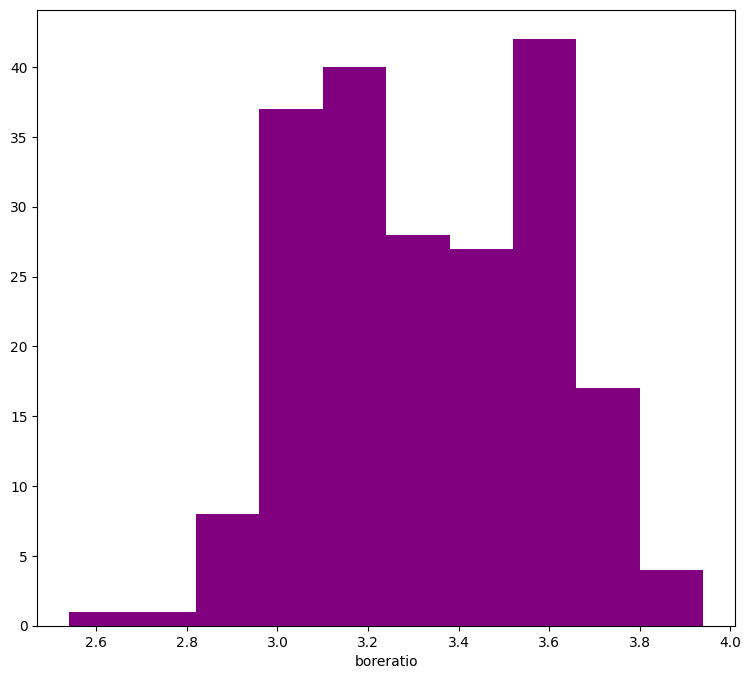

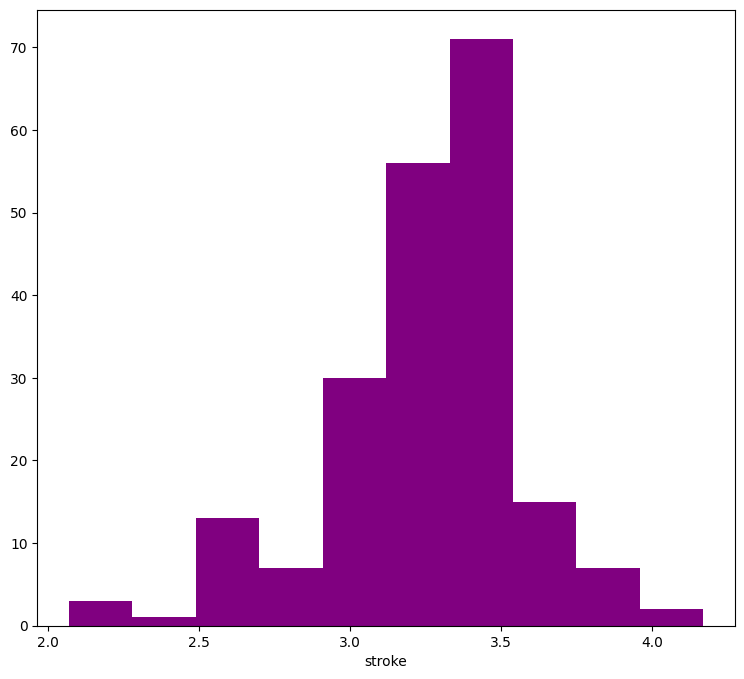

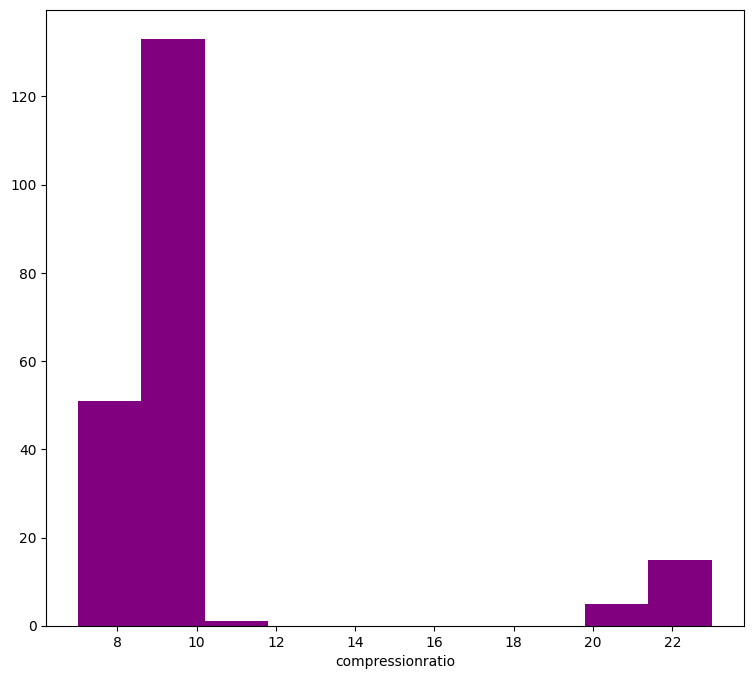

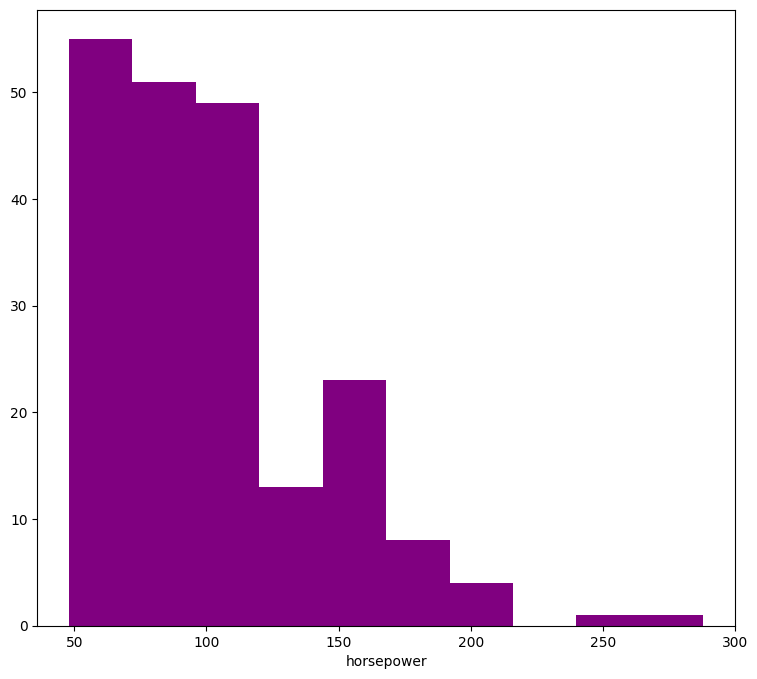

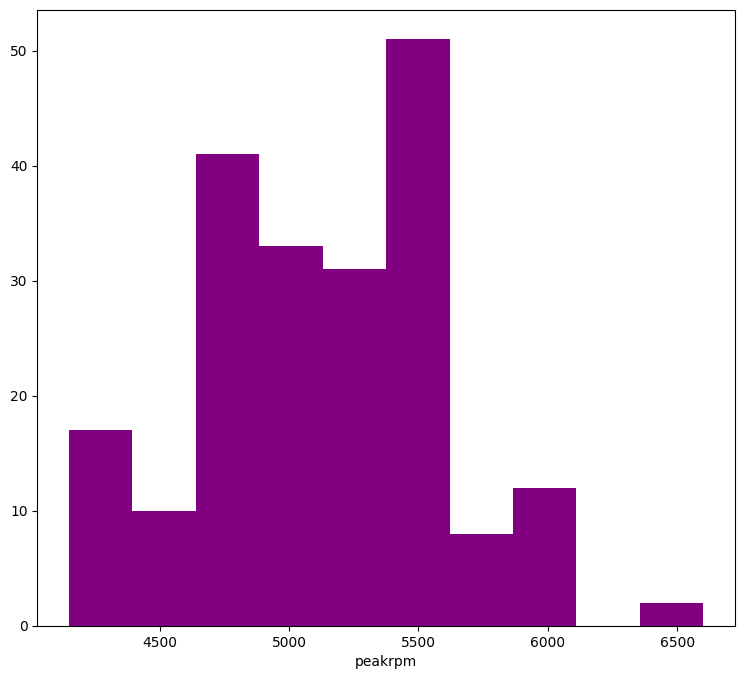

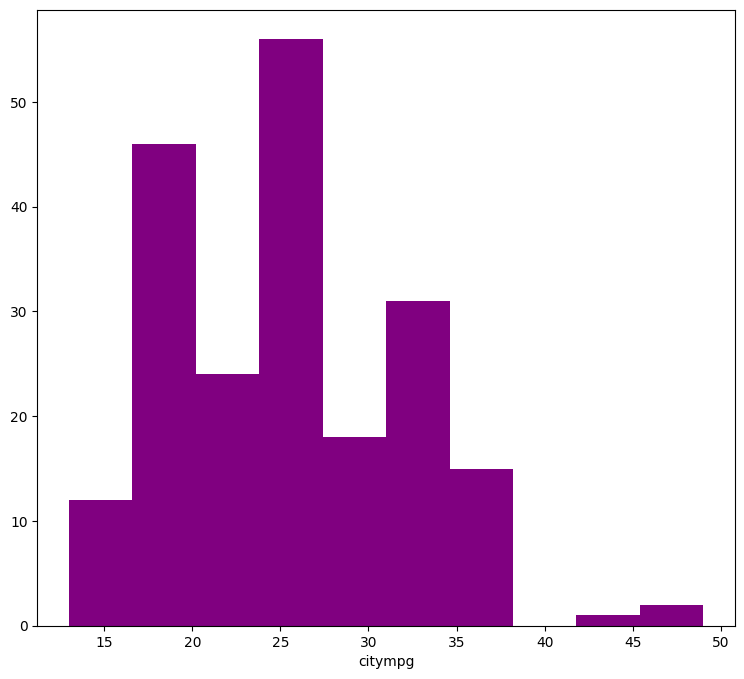

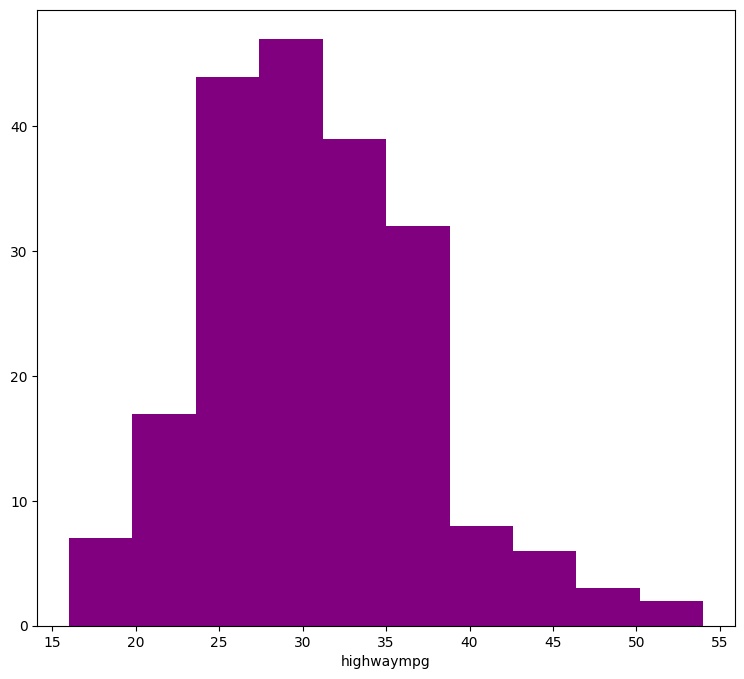

In [ ]:
for i in dataset.drop(dataset[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(dataset[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

Text(0.5, 1.0, 'Correlation ')

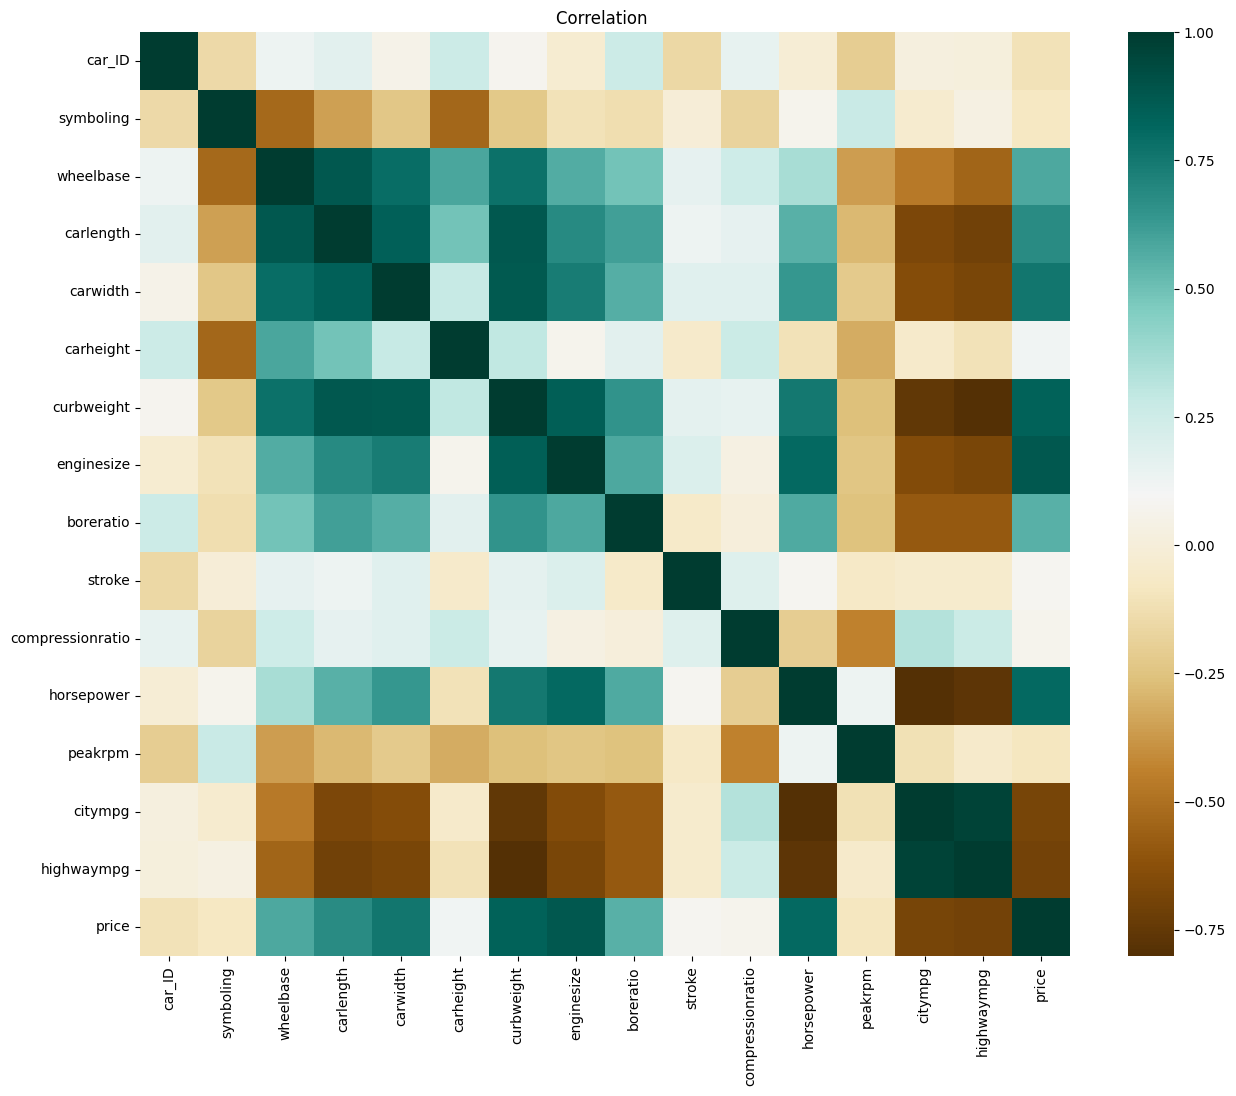

In [ ]:
corr=dataset.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

<Axes: xlabel='car_ID', ylabel='fueltype'>

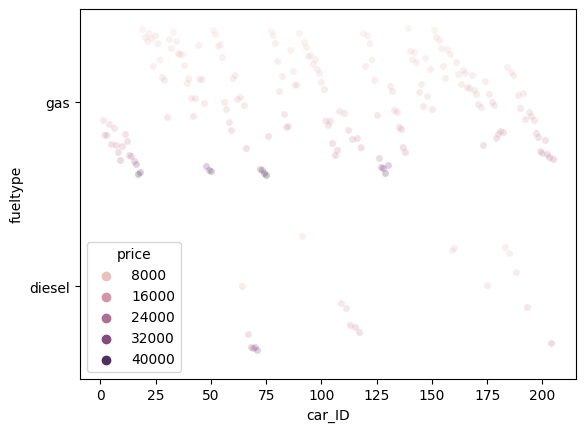

In [ ]:
sns.stripplot(x="car_ID", y="fueltype", hue="price",
              data=dataset, dodge=True, jitter=True,
              alpha=.25, zorder=1)


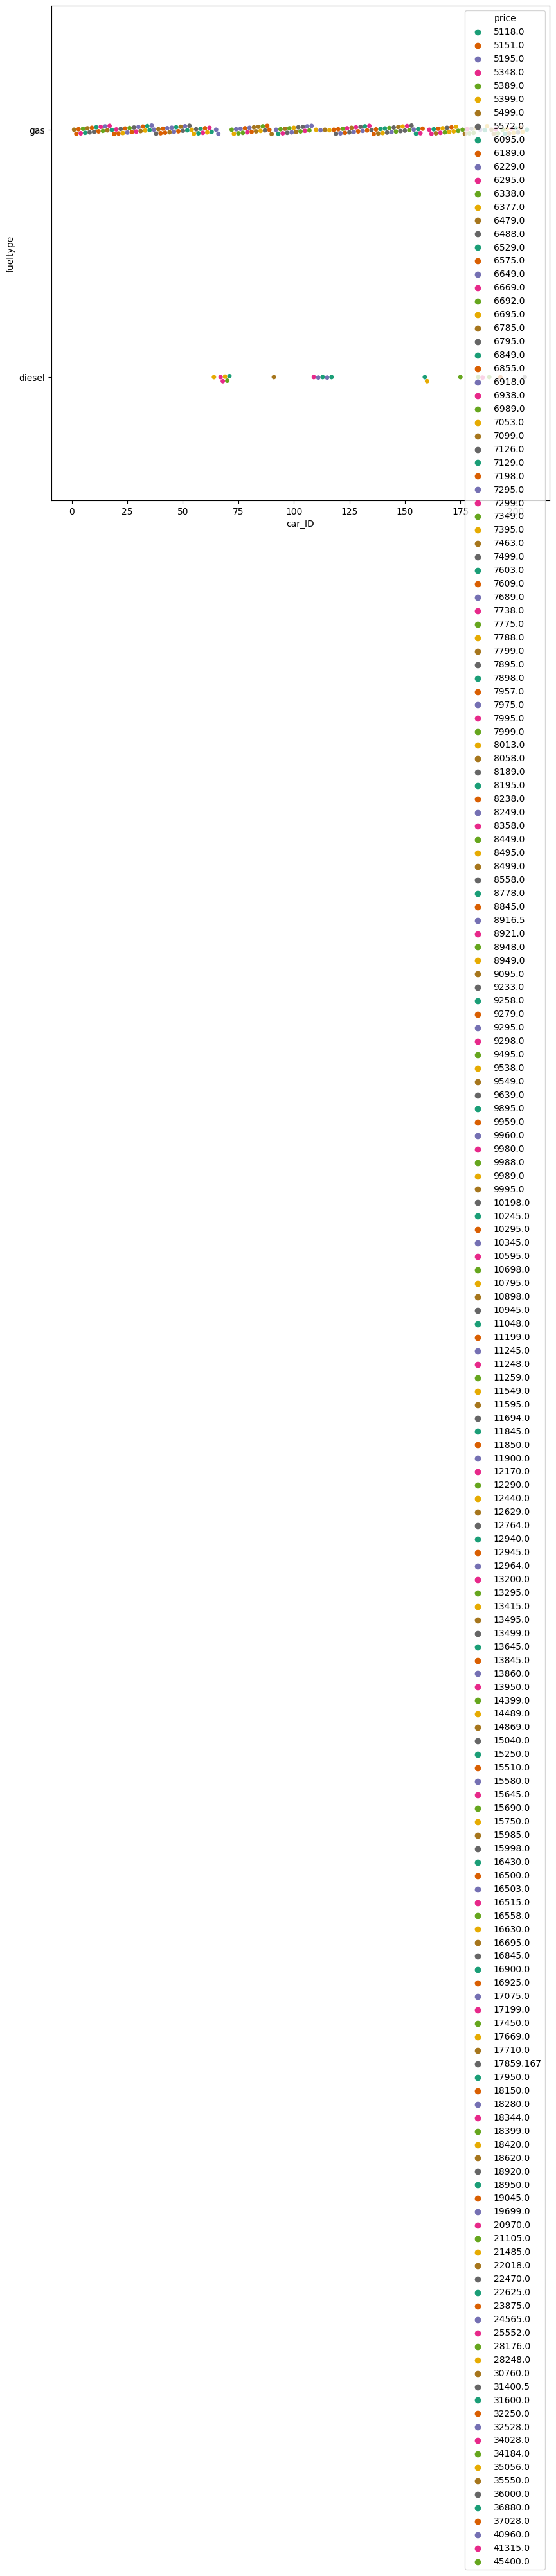

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="car_ID", y="fueltype", hue="price",
              palette="Dark2", data=dataset)
ax=sns.set(style="darkgrid")

ValueError: ignored

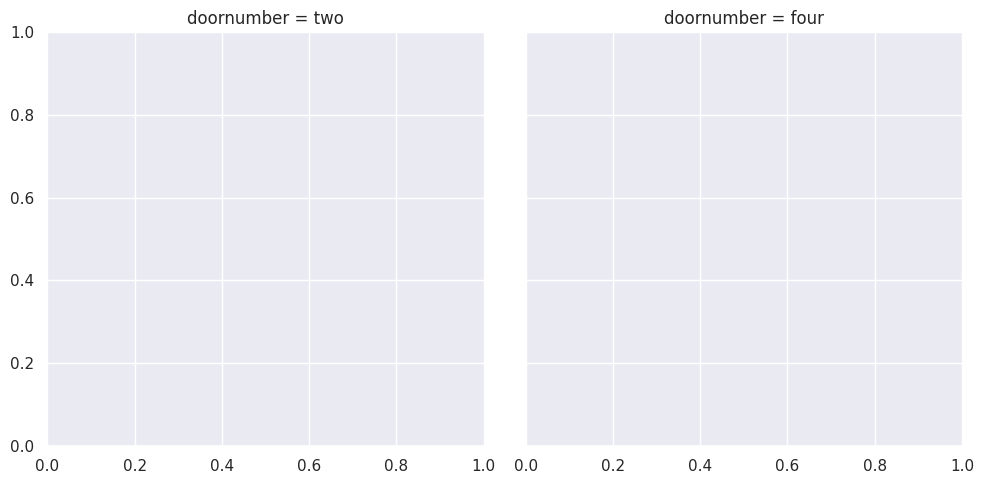

In [ ]:
g = sns.FacetGrid(dataset, col="doornumber", hue="price", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "carbody").add_legend())

In [ ]:
x=dataset.drop('price',axis=1)
y=dataset['price']

In [ ]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

NameError: ignored